In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import json
import os
import page_ranker as pr
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
cwd = os.getcwd()

dir_as_list = cwd.split('/')
base_path=''
go = True
i=0
while go:
    base_path= base_path+dir_as_list[i]+'/'
    if dir_as_list[i]=='GitHub':
        go = False
    i=i+1
    
rel_path = "research/sample-graphs/sourcecred_research.json"

abs_file_path = os.path.abspath(os.path.join(base_path, rel_path))

In [14]:
abs_file_path

'/Users/Zargham/Documents/GitHub/research/sample-graphs/sourcecred_research.json'

In [15]:
import sys
infra_path = 'infra/'
sys.path.insert(0, os.path.join(base_path, infra_path))
import import_graph as ig #this accesses Dandelion's version; there's also a local version

In [16]:
with open(abs_file_path) as json_file:  
    data = json.load(json_file)

In [17]:
G = ig.json_to_graph(data)

In [30]:
iterations = 150


alpha = .01
seed = {n:0.0 for n in G.nodes}
seed[0]=1.0 #4392 is the repo itself
self_loop_wt = 1/1000


In [31]:
r, df, g = pr.pageRanker(G,
                         alpha,
                         iterations,
                         seed=seed,
                         initial_value = seed,
                         lazy=False,
                         self_loop_wt=self_loop_wt)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.010495,0.989505,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.043783,0.010452,0.135109,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067555,0.135109,0.000000,0.067555
3,0.010378,0.145719,0.011755,0.000640,0.005120,0.0,0.011143,0.011143,0.011143,0.011143,...,0.014344,0.014344,0.014344,0.014344,0.014344,0.014344,0.000730,0.164343,0.000000,0.037632
4,0.014979,0.044069,0.032359,0.000831,0.006356,0.0,0.007053,0.007053,0.007053,0.007053,...,0.011947,0.011947,0.011947,0.011947,0.011947,0.011947,0.030578,0.093277,0.000127,0.050976


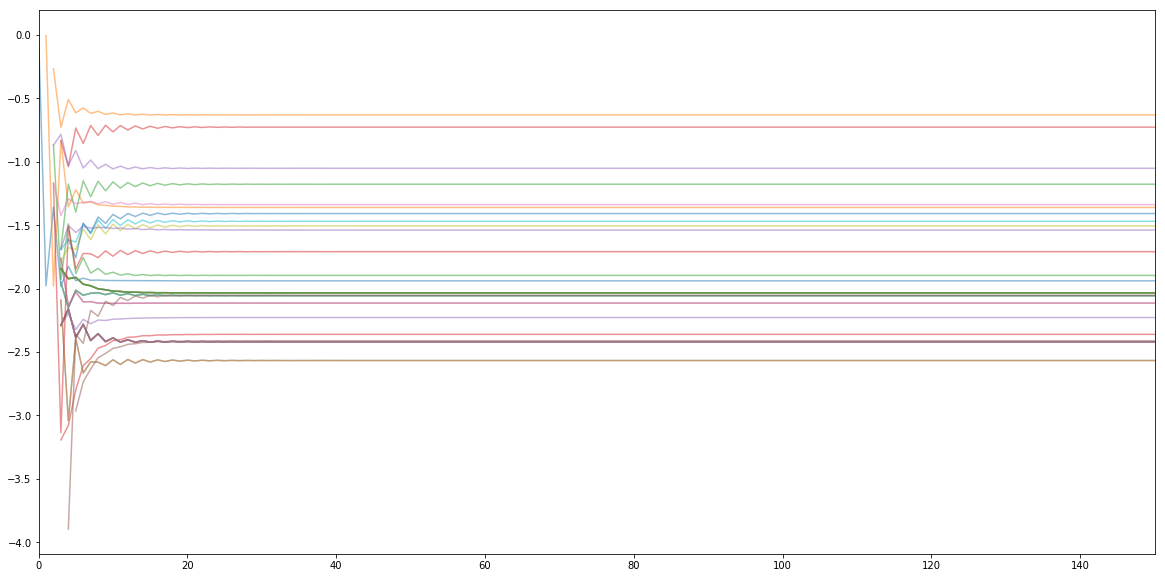

In [33]:
df.apply(np.log10).plot(legend=False, figsize=(20,10),alpha=.5)

Text(0, 0.5, '$\\max_i\\, c_i^{t+1}-c_i^t$')

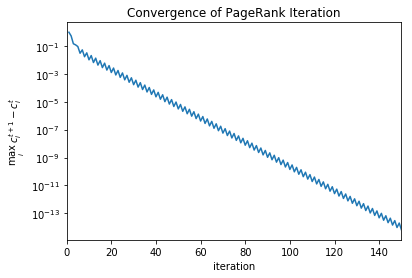

In [34]:
df.diff().T.max().plot(logy=True)
plt.title('Convergence of PageRank Iteration')
plt.xlabel('iteration')
plt.ylabel("$\max_i\, c_i^{t+1}-c_i^t$")

In [35]:
top25 = list(df.T.reset_index().sort_values(iterations).tail(25).index)

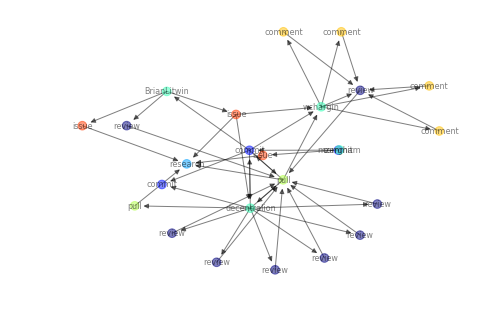

In [43]:
isg.inspectSubGraph(G, top25, expand=False, verbose=False, label=True,pos = "kk")

(array([ 1., 14.,  0.,  4.,  1., 12.,  2.,  0.,  0.,  3.]),
 array([0.17638069, 0.27488242, 0.37338414, 0.47188587, 0.5703876 ,
        0.66888932, 0.76739105, 0.86589277, 0.9643945 , 1.06289623,
        1.16139795]),
 <a list of 10 Patch objects>)

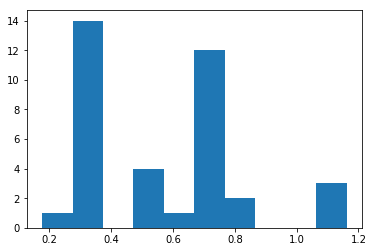

In [37]:
plt.hist([np.log10(v) for v in list(nx.get_node_attributes(G,'total_wt').values())])

array([0.01149369, 0.04359104, 0.01268826, 0.00435189, 0.00590624,
       0.00387155, 0.00876692, 0.00876692, 0.00876692, 0.00876692,
       0.00270497, 0.00270497, 0.00380147, 0.00380147, 0.00380147,
       0.00380147, 0.00380147, 0.00380147, 0.03117704, 0.03390909,
       0.03901093, 0.23415022, 0.06644366, 0.18733803, 0.02892082,
       0.00767791, 0.00767791, 0.00924289, 0.00924289, 0.00924289,
       0.00924289, 0.00924289, 0.00924289, 0.01951924, 0.08877731,
       0.00885857, 0.04589285])